#### Bioinformatics with Biotite

+ What is Biotite
+ Biotite is like a Swiss army knife for bioinformatics
+ It can handle a major part of the typical workflow for sequence and biomolecular structure data:
    - Searching and fetching data from biological databases
    - Reading and writing popular sequence/structure file formats
    - Analyzing and editing sequence/structure data
    - Visualizing sequence/structure data
    - Interfacing external applications for further analysis


    
#### Modules of Biotite
+ Sequence:functionality for working with sequence information of any kind
+ Structure:enables handling of 3D structures of biomolecules
+ Applications:provides interfaces for external software, in case Biotite’s integrated functionality is not sufficient for your tasks
+ Database:searching and downloading data from biological databases, including the arguably most important ones: the RCSB PDB and the NCBI Entrez database.

#### Installation
+ pip install biotite

In [1]:
#!pip install biotite

### Working with Sequences using the sequence subpackage
#### Sequence Analysis
+ DNA and RNA Sequence
    - A Adenine
    - C Cytosine
    - G Guanine
    - T Thymine
    - U Uracil * RNA
    
 
+ DNA Structure

In [2]:
# Creating a sequence
import biotite.sequence as seq

In [3]:
# dir(seq)

# General Sequence
dna = seq.NucleotideSequence('ATCTGCAT')
print(dna)

ATCTGCAT


In [4]:
# Display with str
str(dna)

'ATCTGCAT'

In [5]:
# Get all the letters in my sequence
print(dna.alphabet)

['A', 'C', 'G', 'T']


In [6]:
# Get all the letters in your sequence
print(dna.get_alphabet())

['A', 'C', 'G', 'T']


In [7]:
# dir(dna)
print(dna)
print("--------------")
print(dna.reverse())
print("--------------")
print(dna.complement())

print("--------------")
# Reverse complement
print(dna.reverse().complement())

print("--------------")
# Custom Method
print(seq.NucleotideSequence(str(dna)[::-1]).complement())

ATCTGCAT
--------------
TACGTCTA
--------------
TAGACGTA
--------------
ATGCAGAT
--------------
ATGCAGAT


In [8]:
# Creating A Protein Sequence
protein_seq = seq.ProteinSequence("MIT")

print(protein_seq)

MIT


In [9]:
# Freq or Count of Aminoacids
protein_seq.get_symbol_frequency()

{'A': 0,
 'C': 0,
 'D': 0,
 'E': 0,
 'F': 0,
 'G': 0,
 'H': 0,
 'I': 1,
 'K': 0,
 'L': 0,
 'M': 1,
 'N': 0,
 'P': 0,
 'Q': 0,
 'R': 0,
 'S': 0,
 'T': 1,
 'V': 0,
 'W': 0,
 'Y': 0,
 'B': 0,
 'Z': 0,
 'X': 0,
 '*': 0}

In [10]:
# Convert Amino Acids (1 to 3 codons)

for aa in protein_seq:
    print(aa, seq.ProteinSequence.convert_letter_1to3(aa))

M MET
I ILE
T THR


In [11]:
# Create A Protein Sequence
protein_seq2 = seq.ProteinSequence("MetIleThr")

print(protein_seq2)

METILETHR


In [12]:
# dir(protein_seq2)

In [13]:
# Convert Amino Acids (3 to 1 codons)
for aa in protein_seq2:
    print(aa,seq.ProteinSequence.convert_letter_1to3(aa))

M MET
E GLU
T THR
I ILE
L LEU
E GLU
T THR
H HIS
R ARG


#### Sequence Manipulation 
** convert to string first
+ Count
+ Find Nucleotides and Subseq
+ Join

In [14]:
dna = seq.NucleotideSequence('ATGATCTCGTAA')

In [15]:
print(dna)

print(len(dna))

print(str(dna))

ATGATCTCGTAA
12
ATGATCTCGTAA


In [16]:
# find the position of Base or Nucleotide
str(dna).find('T')

1

In [17]:
# Count the Freq of Nucleotide
# Method 1

str(dna).count('G')

2

In [18]:
# Method 2
dna.get_symbol_frequency()

{'A': 4, 'C': 2, 'G': 2, 'T': 4}

In [19]:
# Searching for Subseq
sub_seq = seq.NucleotideSequence('GAT')
print(sub_seq)

GAT


In [20]:
print(dna)
print(sub_seq)

ATGATCTCGTAA
GAT


In [21]:
# Finding sebsequence
print(seq.find_subsequence(dna,sub_seq))

[2]


In [22]:
# Find the occurence of Nucleotide in seq
print(seq.find_symbol(dna,'G'))

# Find the occurence of Nucleotide in seq
print(seq.find_symbol_first(dna,'G'))

# Find the occurence of Nucleotide in seq
print(seq.find_symbol_last(dna,'G'))

[2 8]
2
8


In [23]:
# Plot of our Freq/Count of N
import matplotlib.pyplot as plt

dna_freq = dna.get_symbol_frequency()
dna_freq

{'A': 4, 'C': 2, 'G': 2, 'T': 4}

<BarContainer object of 4 artists>

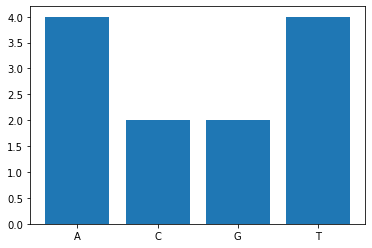

In [24]:
plt.bar(dna_freq.keys(),dna_freq.values())

#### Protein Synthesis
+ Transcription
+ Translation


In [25]:
# Transcription **
# DNA to mrna
# write -give messenger
print(dna)

ATGATCTCGTAA


In [26]:
# Translate
# Must specify complete true
print(dna.translate(complete=True))

MIS*


In [27]:
# Protein of AA
protein = dna.translate(complete=True)
print(protein)

MIS*


In [28]:
# Amino Acids in Codon Table
# official NCBI
print(seq.CodonTable.load(1))

AAA K      AAC N      AAG K      AAT N
ACA T      ACC T      ACG T      ACT T
AGA R      AGC S      AGG R      AGT S
ATA I      ATC I      ATG M i    ATT I

CAA Q      CAC H      CAG Q      CAT H
CCA P      CCC P      CCG P      CCT P
CGA R      CGC R      CGG R      CGT R
CTA L      CTC L      CTG L i    CTT L

GAA E      GAC D      GAG E      GAT D
GCA A      GCC A      GCG A      GCT A
GGA G      GGC G      GGG G      GGT G
GTA V      GTC V      GTG V      GTT V

TAA *      TAC Y      TAG *      TAT Y
TCA S      TCC S      TCG S      TCT S
TGA *      TGC C      TGG W      TGT C
TTA L      TTC F      TTG L i    TTT F


In [29]:
# NCBI biotite
print(seq.CodonTable.default_table())

AAA K      AAC N      AAG K      AAT N
ACA T      ACC T      ACG T      ACT T
AGA R      AGC S      AGG R      AGT S
ATA I      ATC I      ATG M i    ATT I

CAA Q      CAC H      CAG Q      CAT H
CCA P      CCC P      CCG P      CCT P
CGA R      CGC R      CGG R      CGT R
CTA L      CTC L      CTG L      CTT L

GAA E      GAC D      GAG E      GAT D
GCA A      GCC A      GCG A      GCT A
GGA G      GGC G      GGG G      GGT G
GTA V      GTC V      GTG V      GTT V

TAA *      TAC Y      TAG *      TAT Y
TCA S      TCC S      TCG S      TCT S
TGA *      TGC C      TGG W      TGT C
TTA L      TTC F      TTG L      TTT F


In [30]:
# Search for the amino acid nucleotide combination
table = seq.CodonTable.default_table()

type(table)

biotite.sequence.CodonTable

In [31]:
# Find a AA by Codon ( 3N )
table["GAA"]

'E'

In [32]:
# Find Codon for AA ( 3N )
table['E']

('GAA', 'GAG')

In [33]:
# Check for Codon Table of Other Species
# For Bacterial Genome
bacterial_tb = seq.CodonTable.load(11)

print(bacterial_tb)

AAA K      AAC N      AAG K      AAT N
ACA T      ACC T      ACG T      ACT T
AGA R      AGC S      AGG R      AGT S
ATA I i    ATC I i    ATG M i    ATT I

CAA Q      CAC H      CAG Q      CAT H
CCA P      CCC P      CCG P      CCT P
CGA R      CGC R      CGG R      CGT R
CTA L      CTC L      CTG L i    CTT L

GAA E      GAC D      GAG E      GAT D
GCA A      GCC A      GCG A      GCT A
GGA G      GGC G      GGG G      GGT G
GTA V      GTC V      GTG V i    GTT V

TAA *      TAC Y      TAG *      TAT Y
TCA S      TCC S      TCG S      TCT S
TGA *      TGC C      TGG W      TGT C
TTA L      TTC F      TTG L i    TTT F


In [34]:
# For Yeast Mitochondrial
# using name
yeast_tb = seq.CodonTable.load("Yeast Mitochondrial")

print(yeast_tb)

AAA K      AAC N      AAG K      AAT N
ACA T      ACC T      ACG T      ACT T
AGA R      AGC S      AGG R      AGT S
ATA M i    ATC I      ATG M i    ATT I

CAA Q      CAC H      CAG Q      CAT H
CCA P      CCC P      CCG P      CCT P
CGA R      CGC R      CGG R      CGT R
CTA T      CTC T      CTG T      CTT T

GAA E      GAC D      GAG E      GAT D
GCA A      GCC A      GCG A      GCT A
GGA G      GGC G      GGG G      GGT G
GTA V      GTC V      GTG V      GTT V

TAA *      TAC Y      TAG *      TAT Y
TCA S      TCC S      TCG S      TCT S
TGA W      TGC C      TGG W      TGT C
TTA L      TTC F      TTG L      TTT F


### Sequence Alignment
+ Sequence alignment is a way of arranging the sequences of DNA, RNA, or protein to identify regions of similarity that may be a consequence of functional, structural, or evolutionary relationships between the sequences

![](aligngap.png)

#### Terms
+ Match
+ Mismatch
+ Gaps
+ Similarity
+ Identity
+ Homology


#### Types of Alignment Methods
![](localvsglobalalignment.jpg)
+ Global alignments 
    - optimization that "forces" the alignment to span the entire length of all query sequences
+ Local alignments
    - local alignments identify regions of similarity within long sequences that are often widely divergent overall. 
    - Local alignments are often preferable, but can be more difficult to calculate because of the additional challenge of identifying the regions of similarity
    
    
#### Biotite :Align
+ The function align_optimal(), 
    - it performs an optimal global alignment, using the Needleman-Wunsch algorithm, 
    - it performs an optimal local alignment, using the Smith-Waterman algorithm
    
    
+ Substitution Matrix:
    - It maps a similarity score to two symbols, one from the first sequence the other from the second sequence. 
    - A SubstitutionMatrix object contains two alphabets with length n or m, respectively, and an (n,m)-shaped ndarray storing the similarity scores

In [35]:
# Load pkg
import biotite.sequence.align as align

# Method
# dir(align)



In [36]:
# Create Sub Matrix
# Standart SubMatrix
n_matrix = align.SubstitutionMatrix.std_nucleotide_matrix()
print(n_matrix)

    A   C   G   T
A   5  -4  -4  -4
C  -4   5  -4  -4
G  -4  -4   5  -4
T  -4  -4  -4   5


In [37]:
# Create Sub Matrix
# Standard SubMatrix
p_matrix = align.SubstitutionMatrix.std_protein_matrix()
print(p_matrix)

    A   C   D   E   F   G   H   I   K   L   M   N   P   Q   R   S   T   V   W   Y   B   Z   X   *
A   4   0  -2  -1  -2   0  -2  -1  -1  -1  -1  -2  -1  -1  -1   1   0   0  -3  -2  -2  -1   0  -4
C   0   9  -3  -4  -2  -3  -3  -1  -3  -1  -1  -3  -3  -3  -3  -1  -1  -1  -2  -2  -3  -3  -2  -4
D  -2  -3   6   2  -3  -1  -1  -3  -1  -4  -3   1  -1   0  -2   0  -1  -3  -4  -3   4   1  -1  -4
E  -1  -4   2   5  -3  -2   0  -3   1  -3  -2   0  -1   2   0   0  -1  -2  -3  -2   1   4  -1  -4
F  -2  -2  -3  -3   6  -3  -1   0  -3   0   0  -3  -4  -3  -3  -2  -2  -1   1   3  -3  -3  -1  -4
G   0  -3  -1  -2  -3   6  -2  -4  -2  -4  -3   0  -2  -2  -2   0  -2  -3  -2  -3  -1  -2  -1  -4
H  -2  -3  -1   0  -1  -2   8  -3  -1  -3  -2   1  -2   0   0  -1  -2  -3  -2   2   0   0  -1  -4
I  -1  -1  -3  -3   0  -4  -3   4  -3   2   1  -3  -3  -3  -3  -2  -1   3  -3  -1  -3  -3  -1  -4
K  -1  -3  -1   1  -3  -2  -1  -3   5  -2  -1   0  -1   1   2   0  -1  -2  -3  -2   0   1  -1  -4
L  -1  -1  -4  -3   

In [38]:
# Load SubMatrix from internal database
alph = seq.ProteinSequence.alphabet
matrix_bl50 = align.SubstitutionMatrix(alph,alph,"BLOSUM50")
print(matrix_bl50)

    A   C   D   E   F   G   H   I   K   L   M   N   P   Q   R   S   T   V   W   Y   B   Z   X   *
A   5  -1  -2  -1  -3   0  -2  -1  -1  -2  -1  -1  -1  -1  -2   1   0   0  -3  -2  -2  -1  -1  -5
C  -1  13  -4  -3  -2  -3  -3  -2  -3  -2  -2  -2  -4  -3  -4  -1  -1  -1  -5  -3  -3  -3  -2  -5
D  -2  -4   8   2  -5  -1  -1  -4  -1  -4  -4   2  -1   0  -2   0  -1  -4  -5  -3   5   1  -1  -5
E  -1  -3   2   6  -3  -3   0  -4   1  -3  -2   0  -1   2   0  -1  -1  -3  -3  -2   1   5  -1  -5
F  -3  -2  -5  -3   8  -4  -1   0  -4   1   0  -4  -4  -4  -3  -3  -2  -1   1   4  -4  -4  -2  -5
G   0  -3  -1  -3  -4   8  -2  -4  -2  -4  -3   0  -2  -2  -3   0  -2  -4  -3  -3  -1  -2  -2  -5
H  -2  -3  -1   0  -1  -2  10  -4   0  -3  -1   1  -2   1   0  -1  -2  -4  -3   2   0   0  -1  -5
I  -1  -2  -4  -4   0  -4  -4   5  -3   2   2  -3  -3  -3  -4  -3  -1   4  -3  -1  -4  -3  -1  -5
K  -1  -3  -1   1  -4  -2   0  -3   6  -3  -2   0  -1   2   3   0  -1  -3  -3  -2   0   1  -1  -5
L  -2  -2  -4  -3   

In [39]:
# Protein Seq Alignment
pseq1 = seq.ProteinSequence("MITTITE")
pseq2 = seq.ProteinSequence("ITTITE")

# Protein SubMatrix
print(p_matrix)

    A   C   D   E   F   G   H   I   K   L   M   N   P   Q   R   S   T   V   W   Y   B   Z   X   *
A   4   0  -2  -1  -2   0  -2  -1  -1  -1  -1  -2  -1  -1  -1   1   0   0  -3  -2  -2  -1   0  -4
C   0   9  -3  -4  -2  -3  -3  -1  -3  -1  -1  -3  -3  -3  -3  -1  -1  -1  -2  -2  -3  -3  -2  -4
D  -2  -3   6   2  -3  -1  -1  -3  -1  -4  -3   1  -1   0  -2   0  -1  -3  -4  -3   4   1  -1  -4
E  -1  -4   2   5  -3  -2   0  -3   1  -3  -2   0  -1   2   0   0  -1  -2  -3  -2   1   4  -1  -4
F  -2  -2  -3  -3   6  -3  -1   0  -3   0   0  -3  -4  -3  -3  -2  -2  -1   1   3  -3  -3  -1  -4
G   0  -3  -1  -2  -3   6  -2  -4  -2  -4  -3   0  -2  -2  -2   0  -2  -3  -2  -3  -1  -2  -1  -4
H  -2  -3  -1   0  -1  -2   8  -3  -1  -3  -2   1  -2   0   0  -1  -2  -3  -2   2   0   0  -1  -4
I  -1  -1  -3  -3   0  -4  -3   4  -3   2   1  -3  -3  -3  -3  -2  -1   3  -3  -1  -3  -3  -1  -4
K  -1  -3  -1   1  -3  -2  -1  -3   5  -2  -1   0  -1   1   2   0  -1  -2  -3  -2   0   1  -1  -4
L  -1  -1  -4  -3   

In [40]:
# Local Alignment
alignments = align.align_optimal(pseq1, pseq2, p_matrix,local=True)

for a in alignments:
    print(a)

ITTITE
ITTITE


In [41]:
# Global Alignment
gl_alignments = align.align_optimal(pseq1,pseq2,p_matrix,local=False)

for a in gl_alignments:
    print(a)

MITTITE
-ITTITE


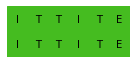

In [42]:
import biotite.sequence.graphics as graphics

fig, ax = plt.subplots(figsize=(2, 1))
graphics.plot_alignment_similarity_based(ax, alignments[0], matrix=p_matrix, symbols_per_line=len(alignments[0]))
fig.tight_layout()

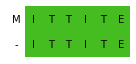

In [43]:
# Global
fig, ax = plt.subplots(figsize=(2, 1))
graphics.plot_alignment_similarity_based(
    ax, gl_alignments[0], matrix=p_matrix, symbols_per_line=len(gl_alignments[0])
)
fig.tight_layout()

In [44]:
# Alignment Score
alignments[0].score

28

In [45]:
loc_alignments = alignments[0]
print("Score",loc_alignments.score)
print("Recalc Score",align.score(loc_alignments,matrix=p_matrix))
print("Sequence Identity",align.get_sequence_identity(loc_alignments))

Score 28
Recalc Score 28
Sequence Identity 1.0


In [46]:
### Nucleotide Sequence Alignment
dna_seq1 = seq.NucleotideSequence('ATGATCTCGTAA')
dna_seq2 = seq.NucleotideSequence('ATCTCGTAG')

In [47]:
print(n_matrix)

    A   C   G   T
A   5  -4  -4  -4
C  -4   5  -4  -4
G  -4  -4   5  -4
T  -4  -4  -4   5


In [48]:
# Local Alignment
dna_alignments = align.align_optimal(dna_seq1,dna_seq2,n_matrix,local=True)

for a in dna_alignments:
    print(a)

ATCTCGTA
ATCTCGTA


In [49]:
# Global Alignment
dna_glb_alignments = align.align_optimal(dna_seq1,dna_seq2,n_matrix,local=False)

for a in dna_glb_alignments:
    print(a)

ATGATCTCGTAA
AT---CTCGTAG
ATGATCTCGTAA
A---TCTCGTAG
ATGATCTCGTAA
---ATCTCGTAG


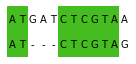

In [50]:
# Global
fig, ax = plt.subplots(figsize=(2, 1))
graphics.plot_alignment_similarity_based(
    ax, dna_glb_alignments[0], matrix=n_matrix, symbols_per_line=len(dna_glb_alignments[0])
)
fig.tight_layout()

In [51]:
glob_alignments = dna_glb_alignments[0]
print("Score",glob_alignments.score)
print("Recalc Score",align.score(glob_alignments,matrix=p_matrix))
print("Sequence Identity",align.get_sequence_identity(glob_alignments))

Score 6
Recalc Score 15
Sequence Identity 0.6666666666666666


#### Working with Biological Data File Formats
+ FASTA
+ GenBank
+ Generic Feature Format 3 (GFF3)
+ FASTQ
+ etc
+ Ebola ID :KU182909.1

    - https://www.ncbi.nlm.nih.gov/nuccore/KU182909.1

In [56]:
import biotite.sequence.io.fasta as fasta

# dir(fasta)

In [59]:
# Read fasta
file = fasta.FastaFile()
file.read("ebola_sequence.fasta")

# print(file) IT WILL SHOW WHOLE FILE

In [61]:
ebola_sequence = fasta.get_sequence(file)

# print(ebola_sequence) IT WILL SHOW ONLY SEQ

In [62]:
# Dictionary
fasta.get_sequences(file)

{'KU182909.1 Ebola virus isolate Ebola virus/H. sapiens-tc/COD/1995/Kikwit-9510622, complete genome': <biotite.sequence.NucleotideSequence at 0x7f973c6b8cd0>}

In [65]:
# Reading Genbank File
import biotite.sequence.io.genbank as gb

# dir(gb)

gfile = gb.GenBankFile()
gfile.read("ebola_sequence.gb")

# print(gfile) IT WILL SHOW WHOLE FILE

In [66]:
print(gb.get_annotation(gfile))

In [69]:
ebola_seq = gb.get_sequence(gfile)

# print(ebola_seq) IT WILL SHOW ONLY SEQ

### Working with DB
+ Task:Reading/Downloading Using the ID

In [71]:
import biotite.database.entrez as entrez

# dir(entrez)

In [72]:
# Get database name
entrez.get_database_name("Nucleotide")

'nuccore'

In [73]:
# Get database name
entrez.get_database_name("Protein")

'protein'

+ Search
+ query(simple/composite) => search => ID => fetch

In [74]:
# Making a simple query
myquery = entrez.SimpleQuery("Covid19")

In [76]:
# searching with query
ans_id = entrez.search(myquery,"nucleotide",number=10)

print(ans_id)

['1869520722', '1869490238', '1869490225', '1869490212', '1869490199', '1869490186', '1869490173', '1869490160', '1869490147', '1869490134']


In [77]:
# Downloading Our File
file_path = entrez.fetch("1834447093","myresult_dir",suffix="fa",db_name="nuccore",ret_type="fasta")

In [79]:
file_path

'myresult_dir/1834447093.fa'

In [80]:
# Reading and Downloading
# id KU182909.1
## Downloading Our File
file_path2 = entrez.fetch("KU182909.1","myresult_dir",suffix="fa",db_name="nuccore",ret_type="fasta")

In [81]:
import biotite.sequence.io.fasta as fasta

file2 = fasta.FastaFile()
file2.read(file_path2)

In [83]:
for h,st in file2.items():
    print(h)
    #print(st)

KU182909.1 Ebola virus isolate Ebola virus/H. sapiens-tc/COD/1995/Kikwit-9510622, complete genome


#### Working with 3D Structures
+ pdb file
+ cif file
+ Fetching file
+ Working with file

In [84]:
# Fetching our 3D structure file
import biotite.database.rcsb as rcsb

# dir(rcsb)

In [86]:
# Reading

# https://www.rcsb.org/structure/4ZS6

pdb_file_path = rcsb.fetch("4ZS6","pdb","mypdb_dir")
print(pdb_file_path)

mypdb_dir/4ZS6.pdb


In [88]:
# Multiple files
pdb_file_path = rcsb.fetch(["4ZS6","6LU7"],"pdb","mypdb_dir")
print(pdb_file_path)

['mypdb_dir/4ZS6.pdb', 'mypdb_dir/6LU7.pdb']


+ Working with 3D Structures
    - pdb
    - cif
    - npz
    - xtc
    - mmt

In [90]:
# Reading 3d Pdb files
import biotite.structure.io.pdb as pdb

# dir(pdb)

In [92]:
# Reading
file_reader = pdb.PDBFile()
file_reader.read("mypdb_dir/4ZS6.pdb")

# print(file_reader) 

In [96]:
# Methods
# dir(file_reader)

In [98]:
protein_struc = file_reader.get_structure()
# print(protein_struc) 

In [100]:
# Coord
# dir(protein_struc)

In [101]:
# Shape and Coord
print("Shape",protein_struc.shape)
print("Coordinates",protein_struc.coord)

Shape (1, 9842)
Coordinates [[[-18.11   24.359 641.863]
  [-17.678  23.037 641.408]
  [-16.857  22.298 642.484]
  ...
  [-28.943  39.391 574.093]
  [-31.744  37.804 575.741]
  [-26.276  43.09  573.911]]]


#### Phylogenetics with Biotite
+ phylogenetics is the study of the evolutionary history and relationships among individuals or groups of organisms

In [102]:
import biotite.sequence.phylo as phylo

# dir(phylo)

In [103]:
# The reference objects
fruits = ["Apple", "Pear", "Orange", "Lemon", "Banana"]
# Create nodes
apple  = phylo.TreeNode(index=fruits.index("Apple"))
pear   = phylo.TreeNode(index=fruits.index("Pear"))
orange = phylo.TreeNode(index=fruits.index("Orange"))
lemon  = phylo.TreeNode(index=fruits.index("Lemon"))
banana = phylo.TreeNode(index=fruits.index("Banana"))
intermediate1 = phylo.TreeNode(
    children=(apple, pear), distances=(2.0, 2.0)
)
intermediate2 = phylo.TreeNode((orange, lemon), (1.0, 1.0))
intermediate3 = phylo.TreeNode((intermediate2, banana), (2.0, 3.0))
root = phylo.TreeNode((intermediate1, intermediate3), (2.0, 1.0))

In [104]:
# Create tree from root node
tree = phylo.Tree(root=root)
# Trees can be converted into Newick notation
print("Tree:", tree.to_newick(labels=fruits))
# Distances can be omitted
print(
    "Tree w/o distances:",
    tree.to_newick(labels=fruits, include_distance=False)
)

Tree: ((Apple:2.0,Pear:2.0):2.0,((Orange:1.0,Lemon:1.0):2.0,Banana:3.0):1.0):0.0;
Tree w/o distances: ((Apple,Pear),((Orange,Lemon),Banana));


In [105]:
# Distances can be measured
distance = tree.get_distance(fruits.index("Apple"), fruits.index("Banana"))
print("Distance Apple-Banana:", distance)

Distance Apple-Banana: 8.0


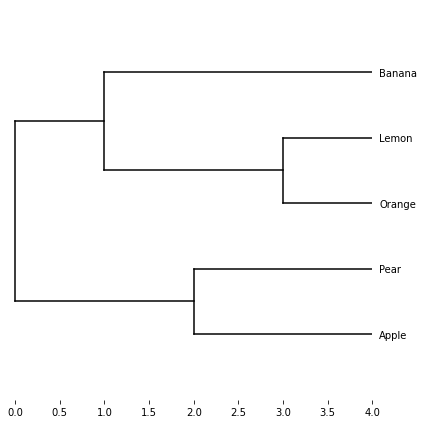

In [106]:
import matplotlib.pyplot as plt
import biotite.sequence.graphics as graphics

# Plot a Phylo Tree

fig, ax = plt.subplots(figsize=(6.0, 6.0))
graphics.plot_dendrogram(ax, tree, labels=fruits)
fig.tight_layout()

### Creating Applications with Biotite.application
+  States
    - Created State : initialize app
    - Running state: start() does task
    - Finished state:
    - Joined state: join() : makes the results of the application accessible.

In [110]:
# Simple app
import biotite.application

# dir(biotite.application)

In [111]:
# BLAST
import biotite.application.blast as blast

# dir(blast)

In [112]:
# task
import biotite.sequence as seq
mini_protein = seq.ProteinSequence('NLYIQWLKDGGPSSGRPPPS')

In [113]:
# Initialize the app & created state
app = blast.BlastWebApp("blastp",mini_protein)
app.start() # task
app.join() #make accessible
alignments = app.get_alignments()

In [114]:
print(alignments[0])

NLYIQWLKDGGPSSGRPPPS
NLYIQWLKDGGPSSGRPPPS


In [115]:
best_alignments = alignments[0]

In [116]:
print("Score",best_alignments.score)
print("E-value",best_alignments.e_value)
print("HIT_ID",best_alignments.hit_id)
print("HIT NAME",best_alignments.hit_definition)

Score 101
E-value 6.19957e-05
HIT_ID 1L2Y_A
HIT NAME Chain A, TC5b [synthetic construct]


In [117]:
myquery2 = entrez.SimpleQuery("SARS-CoV-2")

In [118]:
# searching with query
ans_id = entrez.search(myquery2,"nucleotide",number=10)
ans_id

['1869520722',
 '1869490238',
 '1869490225',
 '1869490212',
 '1869490199',
 '1869490186',
 '1869490173',
 '1869490160',
 '1869490147',
 '1869490134']

In [119]:
import matplotlib.pyplot as plt
import biotite
import biotite.sequence as seq
import biotite.sequence.align as align
import biotite.sequence.io.fasta as fasta
import biotite.database.entrez as entrez
import biotite.sequence.graphics as graphics

In [120]:
# Download and parse protein sequences of Covid and Mers
covid_file_path = entrez.fetch("NC_045512","myresult_dir",suffix="fa",db_name="nuccore",ret_type="fasta")
mers_file_path = entrez.fetch("NC_019843.3","myresult_dir",suffix="fa",db_name="nuccore",ret_type="fasta")

In [121]:
c_file = fasta.FastaFile()
c_file.read(covid_file_path)

m_file = fasta.FastaFile()
m_file.read(mers_file_path)

# Get BLOSUM62 matrix

In [122]:
print(c_file.items())

ItemsView(<biotite.sequence.io.fasta.FastaFile object at 0x7f973c670210>)


In [129]:
"""

for h,s in c_file.items():
    print(h)
    print(s)
    
for h,s in c_file.items():
    print(h)
    print(s)
    covid_seq = seq.NucleotideSequence(s)
    
for h,s in m_file.items():
    print(h)
    print(s)
    mers_seq = seq.NucleotideSequence(s)
--------------------
It was too long result you can run it in your own pc to check.
--------------------
    
    """

'for h,s in c_file.items():\n    print(h)\n    print(s)\n    \nfor h,s in c_file.items():\n    print(h)\n    print(s)\n    covid_seq = seq.NucleotideSequence(s)\n    \nfor h,s in m_file.items():\n    print(h)\n    print(s)\n    mers_seq = seq.NucleotideSequence(s)\n    '

In [125]:
print("Covid Len",len(covid_seq))
print("MERS Len",len(mers_seq))

Covid Len 29903
MERS Len 30119


In [126]:
mini_covid_seq = covid_seq[0:100]
mini_mers_seq = mers_seq[0:100]

In [127]:
matrix = align.SubstitutionMatrix.std_nucleotide_matrix()
# Perform pairwise sequence alignment with affine gap penalty
# Terminal gaps are not penalized
alignments = align.align_optimal(mini_covid_seq, mini_mers_seq, matrix,gap_penalty=(-10, -1), terminal_penalty=False)
              

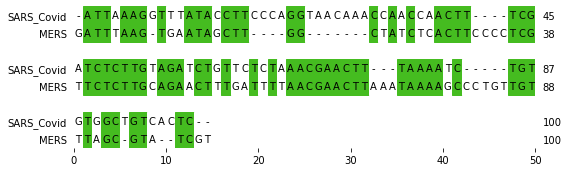

In [128]:
# Draw first and only alignment
# The color intensity indicates the similiarity
fig = plt.figure(figsize=(8.0, 2.5))
ax = fig.add_subplot(111)
graphics.plot_alignment_similarity_based(
    ax, alignments[0], matrix=matrix, labels=["SARS_Covid", "MERS"],
    show_numbers=True, show_line_position=True
)
fig.tight_layout()

plt.show()